## 01. Importing Libraries

In [1]:
# Import Libraries and Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
import scipy
from scipy import stats
import warnings

warnings.filterwarnings("ignore") 

In [2]:
%matplotlib inline

## 02. Importing Data and Standardization

In [3]:
# Set Path
path = 'C:/Users/jeong/OneDrive/Desktop/CF Files/Achievement 6'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'food_surplus_cleaned.csv'))

In [5]:
# Look at data
df.head()

,Unnamed: 0,year,state,sector,sub_sector,sub_sector_category,food_type,tons_surplus,tons_supply,us_dollars_surplus,...,tons_incinerated,tons_land_application,tons_landfilled,tons_sewer,tons_refuse_discards,upstream_mtco2e_footprint,downstream_mtco2e_footprint,total_mtco2e_footprint,gallons_water_footprint,meals_wasted
0,0,2021,Alabama,Farm,Not Applicable,Not Applicable,Dry Goods,8314.881697,320214.881700,3.883810e+06,...,0.000000,0.0,0.000000,0.0,0.000000,34693.574640,2.560352,34696.134990,4.676082e+09,1.385814e+07
1,1,2021,Alabama,Farm,Not Applicable,Not Applicable,Produce,56169.900990,216424.760100,1.586598e+07,...,13.232212,0.0,354.329224,0.0,688.009528,11481.349950,2256.026644,13737.376590,1.828809e+09,9.289640e+07
2,2,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Breads & Bakery,5.014448,188.451867,2.527011e+04,...,0.178206,0.0,4.771954,0.0,0.000000,11.966534,7.289450,19.255983,9.666914e+04,8.269175e+03
3,3,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Dairy & Eggs,2.385432,89.648781,1.279831e+04,...,0.084775,0.0,2.270075,0.0,0.000000,11.419306,1.124870,12.544176,6.806127e+05,3.933744e+03
4,4,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Dry Goods,4.263947,160.246725,1.471922e+04,...,0.151534,0.0,4.057747,0.0,0.000000,13.478114,4.155081,17.633195,5.264528e+05,7.031547e+03


In [6]:
# Check shape
df.shape

(173364, 31)

In [7]:
# Group by year and state and get the average of numerical columns
# 'tons_uneaten' was dropped due to it being redundant to 'tons_eaten'
# 'upstream_mtco2e_footprint' and 'downstream_mtco2e_footprint' are redundant to 'total_mtco2e_footprint'
df_1 = df.groupby(['year', 'state'], as_index = False)['tons_surplus', 'tons_supply', 'us_dollars_surplus', 'tons_waste', 'tons_eaten', 'tons_inedible_parts',
                                                       'tons_not_fit_for_human_consumption', 'tons_donated', 'tons_biomaterial_processing',
                                                       'tons_animal_feed', 'tons_anaerobically_digested', 'tons_composted', 'tons_not_harvested',
                                                       'tons_incinerated', 'tons_land_application', 'tons_landfilled', 'tons_sewer', 'tons_refuse_discards',
                                                       'total_mtco2e_footprint', 'gallons_water_footprint', 'meals_wasted'].mean()

In [8]:
df_1.head()

,year,state,tons_surplus,tons_supply,us_dollars_surplus,tons_waste,tons_eaten,tons_inedible_parts,tons_not_fit_for_human_consumption,tons_donated,...,tons_composted,tons_not_harvested,tons_incinerated,tons_land_application,tons_landfilled,tons_sewer,tons_refuse_discards,total_mtco2e_footprint,gallons_water_footprint,meals_wasted
0,2010,Alabama,2881.646528,29509.666794,1.574336e+07,2615.017343,6496.502433,415.774212,1504.784092,47.978452,...,539.767972,189.302847,56.314092,15.841259,1507.966236,291.902658,2.564199,16204.752248,9.850608e+08,4.722780e+06
1,2010,Alaska,546.976530,4732.573168,3.359681e+06,503.427221,1293.205061,68.976133,306.378603,8.757512,...,133.116798,0.725912,0.000000,0.608737,300.157090,66.847521,0.187753,2995.439236,1.507165e+08,8.970317e+05
2,2010,Arizona,6688.621471,39189.657627,2.297569e+07,6456.158864,9665.059281,943.880146,3184.514075,69.092177,...,917.589312,2510.407323,0.000000,93.110934,2419.001925,470.683060,11.044349,22051.765846,1.227623e+09,1.103255e+07
3,2010,Arkansas,2033.780916,27623.156739,9.686158e+06,1626.620850,4006.418606,515.803732,1175.381721,38.871307,...,362.277260,87.543575,0.000000,24.443580,930.805497,211.829182,1.340760,10774.685490,6.630802e+08,3.324849e+06
4,2010,California,45043.737523,398745.203200,1.317959e+08,41812.617807,42712.659132,9353.091115,22393.260824,539.933415,...,7890.387756,21478.289898,226.391277,1601.436424,8026.599953,1832.839174,321.622279,108955.002542,6.822044e+09,7.417301e+07


In [9]:
# Remove year and state because k-means only handles numerical variables
df_2 = df_1.drop(columns=['year', 'state'])

In [10]:
df_2.head()

,tons_surplus,tons_supply,us_dollars_surplus,tons_waste,tons_eaten,tons_inedible_parts,tons_not_fit_for_human_consumption,tons_donated,tons_biomaterial_processing,tons_animal_feed,...,tons_composted,tons_not_harvested,tons_incinerated,tons_land_application,tons_landfilled,tons_sewer,tons_refuse_discards,total_mtco2e_footprint,gallons_water_footprint,meals_wasted
0,2881.646528,29509.666794,1.574336e+07,2615.017343,6496.502433,415.774212,1504.784092,47.978452,118.096712,100.445411,...,539.767972,189.302847,56.314092,15.841259,1507.966236,291.902658,2.564199,16204.752248,9.850608e+08,4.722780e+06
1,546.976530,4732.573168,3.359681e+06,503.427221,1293.205061,68.976133,306.378603,8.757512,20.454299,14.315976,...,133.116798,0.725912,0.000000,0.608737,300.157090,66.847521,0.187753,2995.439236,1.507165e+08,8.970317e+05
2,6688.621471,39189.657627,2.297569e+07,6456.158864,9665.059281,943.880146,3184.514075,69.092177,15.264337,147.961560,...,917.589312,2510.407323,0.000000,93.110934,2419.001925,470.683060,11.044349,22051.765846,1.227623e+09,1.103255e+07
3,2033.780916,27623.156739,9.686158e+06,1626.620850,4006.418606,515.803732,1175.381721,38.871307,143.880486,224.348592,...,362.277260,87.543575,0.000000,24.443580,930.805497,211.829182,1.340760,10774.685490,6.630802e+08,3.324849e+06
4,45043.737523,398745.203200,1.317959e+08,41812.617807,42712.659132,9353.091115,22393.260824,539.933415,254.445462,2436.042929,...,7890.387756,21478.289898,226.391277,1601.436424,8026.599953,1832.839174,321.622279,108955.002542,6.822044e+09,7.417301e+07


In [11]:
# Standardize the data to eliminate bias from difference between variables' scales
for column in df_2.columns:
    df_2[column] = stats.zscore(df_2[column])

In [12]:
df_2.head()

,tons_surplus,tons_supply,us_dollars_surplus,tons_waste,tons_eaten,tons_inedible_parts,tons_not_fit_for_human_consumption,tons_donated,tons_biomaterial_processing,tons_animal_feed,...,tons_composted,tons_not_harvested,tons_incinerated,tons_land_application,tons_landfilled,tons_sewer,tons_refuse_discards,total_mtco2e_footprint,gallons_water_footprint,meals_wasted
0,-0.398466,-0.428069,-0.381230,-0.373369,-0.314237,-0.509504,-0.439520,-0.521407,0.315001,-0.669261,...,-0.367432,-0.251948,-0.395952,-0.427369,-0.255340,-0.338769,-0.367628,-0.317003,-0.292585,-0.396276
1,-0.707755,-0.754544,-0.802915,-0.679138,-0.836908,-0.711105,-0.748719,-0.850456,-0.806994,-0.815335,...,-0.677692,-0.313606,-0.497386,-0.450269,-0.811905,-0.855350,-0.389987,-0.857666,-0.861666,-0.705078
2,0.105869,-0.300520,-0.134957,0.182847,0.004044,-0.202506,-0.006135,-0.344270,-0.866631,-0.588674,...,-0.079168,0.506976,-0.497386,-0.311203,0.164471,0.071595,-0.287844,-0.077682,-0.127141,0.113028
3,-0.510788,-0.452926,-0.587488,-0.516494,-0.564366,-0.451355,-0.524508,-0.597812,0.611279,-0.459122,...,-0.502851,-0.285220,-0.497386,-0.414436,-0.521299,-0.522566,-0.379139,-0.539258,-0.512198,-0.509112
4,5.187022,4.437159,3.570552,5.302638,3.323674,4.685940,4.949886,3.605915,1.881766,3.291885,...,5.240824,6.708847,-0.089605,1.956387,2.748487,3.198226,2.634196,3.479307,3.688642,5.209522


df_1.head()

## 03. Elbow Technique

In [13]:
# Define the range of potential clustes in the data and k-means clusters in the range assigned
num_cl = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [14]:
# Creates a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))]

score

[-12599.999999999998,
 -6725.848105343906,
 -4406.92997672604,
 -3354.8902773864706,
 -2564.598727279241,
 -1995.2367680423624,
 -1645.3686753820948,
 -1385.30360177484,
 -1180.9561613426959]

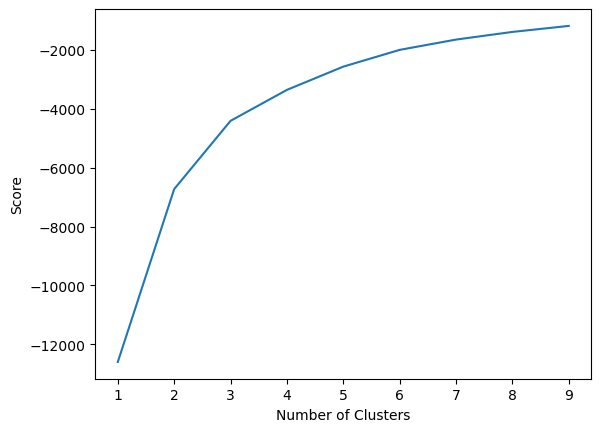

In [15]:
# PLot the elbow curve using PyLab
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.show()

There is a kink at 3 and the curve straigthens out after. The optimal count should be 3

## 04. K-Means Clustering

In [16]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3)

In [17]:
# Fit the k-means object to the data
kmeans.fit(df_2)

KMeans(n_clusters=3)

In [18]:
df_2['clusters']= kmeans.fit_predict(df_2)

In [19]:
pd.set_option('display.max_columns', None)
df_2.head()

,tons_surplus,tons_supply,us_dollars_surplus,tons_waste,tons_eaten,tons_inedible_parts,tons_not_fit_for_human_consumption,tons_donated,tons_biomaterial_processing,tons_animal_feed,tons_anaerobically_digested,tons_composted,tons_not_harvested,tons_incinerated,tons_land_application,tons_landfilled,tons_sewer,tons_refuse_discards,total_mtco2e_footprint,gallons_water_footprint,meals_wasted,clusters
0,-0.398466,-0.428069,-0.381230,-0.373369,-0.314237,-0.509504,-0.439520,-0.521407,0.315001,-0.669261,-0.428691,-0.367432,-0.251948,-0.395952,-0.427369,-0.255340,-0.338769,-0.367628,-0.317003,-0.292585,-0.396276,0
1,-0.707755,-0.754544,-0.802915,-0.679138,-0.836908,-0.711105,-0.748719,-0.850456,-0.806994,-0.815335,-0.479112,-0.677692,-0.313606,-0.497386,-0.450269,-0.811905,-0.855350,-0.389987,-0.857666,-0.861666,-0.705078,0
2,0.105869,-0.300520,-0.134957,0.182847,0.004044,-0.202506,-0.006135,-0.344270,-0.866631,-0.588674,-0.307762,-0.079168,0.506976,-0.497386,-0.311203,0.164471,0.071595,-0.287844,-0.077682,-0.127141,0.113028,0
3,-0.510788,-0.452926,-0.587488,-0.516494,-0.564366,-0.451355,-0.524508,-0.597812,0.611279,-0.459122,-0.444369,-0.502851,-0.285220,-0.497386,-0.414436,-0.521299,-0.522566,-0.379139,-0.539258,-0.512198,-0.509112,0
4,5.187022,4.437159,3.570552,5.302638,3.323674,4.685940,4.949886,3.605915,1.881766,3.291885,1.802509,5.240824,6.708847,-0.089605,1.956387,2.748487,3.198226,2.634196,3.479307,3.688642,5.209522,2


In [20]:
df_2['clusters'].value_counts()

0    444
1    144
2     12
Name: clusters, dtype: int64

## 05. Visualizations Using Clustered Data

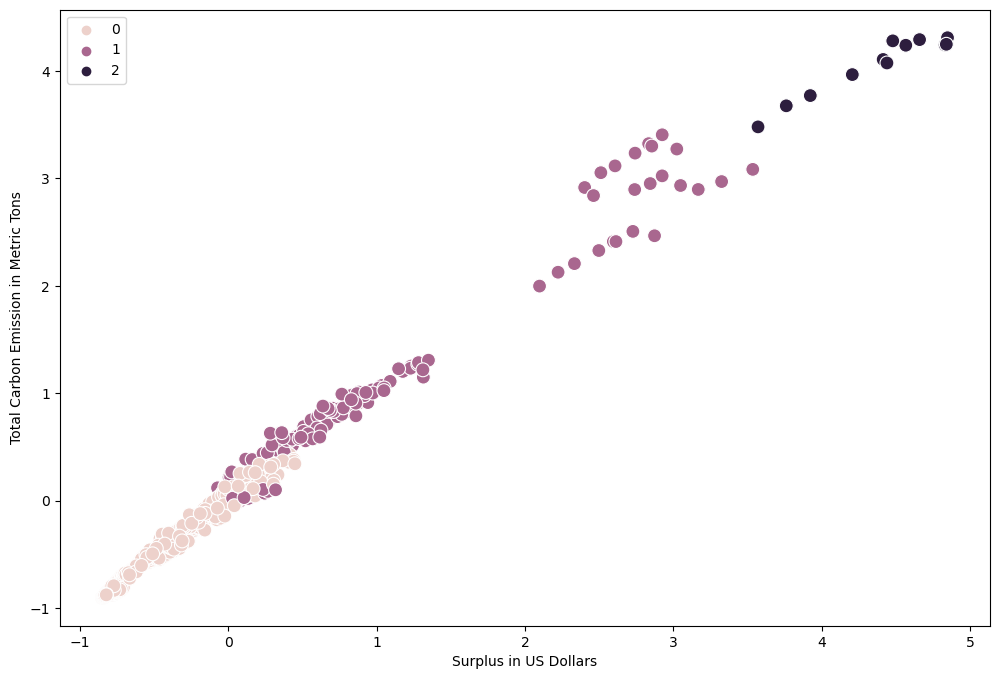

In [21]:
# PLot the clusters for the "us_dollars_surplus" and "total_mtco2e_footprint" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['us_dollars_surplus'], y=df_2['total_mtco2e_footprint'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Surplus in US Dollars')
plt.ylabel('Total Carbon Emission in Metric Tons')
plt.show()

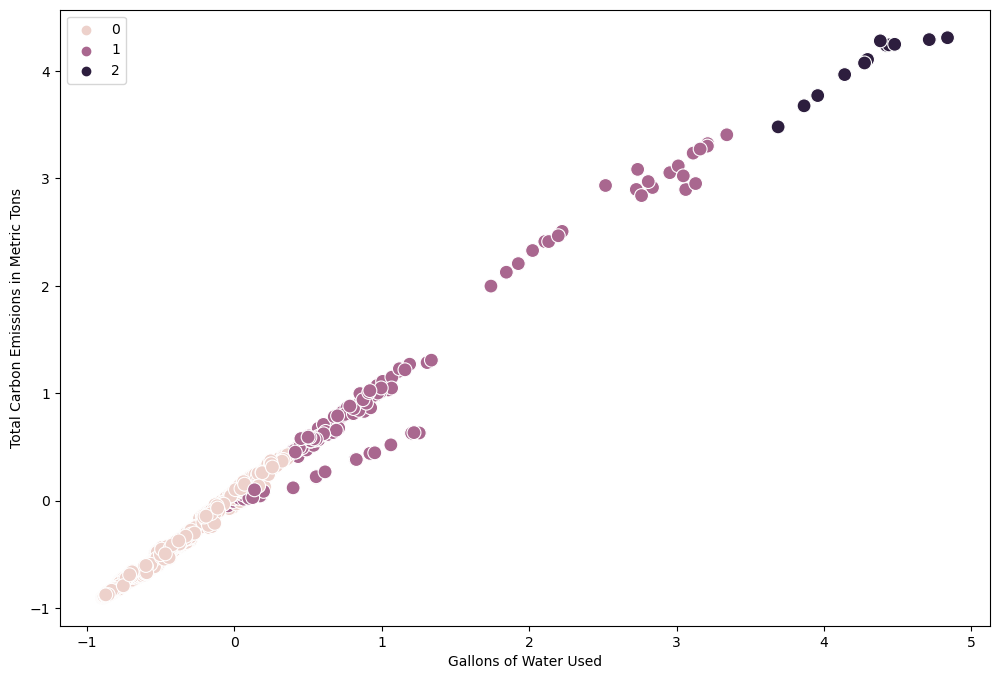

In [22]:
# PLot the clusters for the "gallons_water_footprint" and "total_mtco2e_footprint" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['gallons_water_footprint'], y=df_2['total_mtco2e_footprint'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Gallons of Water Used')
plt.ylabel('Total Carbon Emissions in Metric Tons')
plt.show()

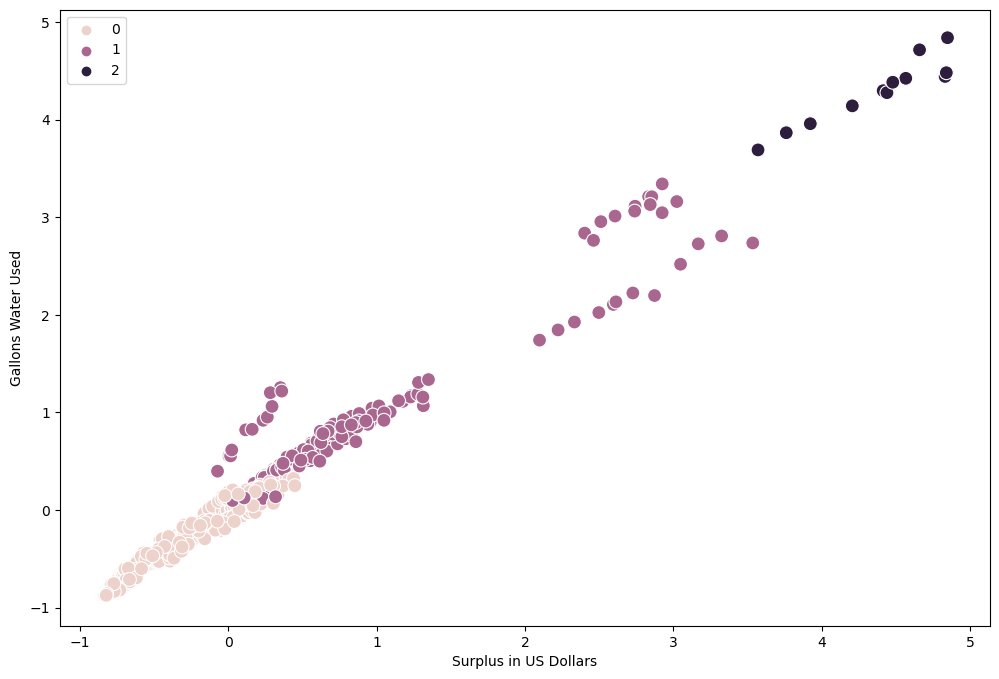

In [23]:
# PLot the clusters for the "us_dollars_surplus" and "gallons_water_footprint" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['us_dollars_surplus'], y=df_2['gallons_water_footprint'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Surplus in US Dollars')
plt.ylabel('Gallons Water Used')
plt.show()

In [24]:
# Creating flags for different cluters and creating column 'cluster'
df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'black'
df_2.loc[df_2['clusters'] == 1, 'cluster'] = 'purple'
df_2.loc[df_2['clusters'] == 0, 'cluster'] = 'pink'

In [25]:
# Grouping by 'cluster' colors and calculating statistics
df_2.groupby('cluster').agg({'tons_surplus': ['mean', 'median'],
                             'tons_supply': ['mean', 'median'],
                             'us_dollars_surplus': ['mean', 'median'],
                             'tons_waste': ['mean', 'median'],
                             'tons_eaten': ['mean', 'median'],
                             'tons_inedible_parts': ['mean', 'median'],
                             'tons_not_fit_for_human_consumption': ['mean', 'median'],
                             'tons_donated': ['mean', 'median'],
                             'tons_biomaterial_processing': ['mean', 'median'],
                             'tons_animal_feed': ['mean', 'median'],
                             'tons_anaerobically_digested': ['mean', 'median'],
                             'tons_composted': ['mean', 'median'],
                             'tons_not_harvested': ['mean', 'median'],
                             'tons_incinerated': ['mean', 'median'],
                             'tons_land_application': ['mean', 'median'],
                             'tons_landfilled': ['mean', 'median'],
                             'tons_sewer': ['mean', 'median'],
                             'tons_refuse_discards': ['mean', 'median'],
                             'total_mtco2e_footprint': ['mean', 'median'],
                             'gallons_water_footprint': ['mean', 'median'],
                             'meals_wasted': ['mean', 'median']})

tons_surplus           tons_supply           us_dollars_surplus  \
                mean    median        mean    median               mean   
cluster                                                                   
black       5.559562  5.582986    4.917544  4.976219           4.378331   
pink       -0.395665 -0.456289   -0.410935 -0.447969          -0.418201   
purple      0.756670  0.536131    0.857254  0.609408           0.924591   

                  tons_waste           tons_eaten            \
           median       mean    median       mean    median   
cluster                                                       
black    4.459412   5.640606  5.660272   3.860833  3.950584   
pink    -0.483665  -0.387576 -0.455115  -0.418921 -0.508207   
purple   0.664270   0.724976  0.514912   0.969936  0.801207   

        tons_inedible_parts           tons_not_fit_for_human_consumption  \
                       mean    median                               mean   
cluster                                                                    
black              5.054134  5.080695                           5.308331   
pink              -0.398772 -0.445367                          -0.417202   
purple             0.808370  0.558198                           0.844012   

                  tons_donated           tons_biomaterial_processing  \
           median         mean    median                        mean   
cluster                                                                
black    5.286056     4.831798  4.705008                    2.352558   
pink    -0.500521    -0.426890 -0.516499                   -0.314704   
purple   0.622975     0.913594  0.735282                    0.774292   

                  tons_animal_feed           tons_anaerobically_digested  \
           median             mean    median                        mean   
cluster                                                                    
black    2.411928         3.785416  3.756619                    3.427773   
pink    -0.566352        -0.393127 -0.555844                   -0.296560   
purple   0.557380         0.896689  0.581148                    0.628746   

                  tons_composted           tons_not_harvested            \
           median           mean    median               mean    median   
cluster                                                                   
black    2.429414       5.567589  5.462774           6.623200  6.649833   
pink    -0.370370      -0.359031 -0.445577          -0.241024 -0.284814   
purple   0.277370       0.643045  0.473319           0.191223  0.145283   

        tons_incinerated           tons_land_application            \
                    mean    median                  mean    median   
cluster                                                              
black          -0.026284 -0.039410              2.461635  2.540854   
pink           -0.185611 -0.497386             -0.289472 -0.377904   
purple          0.574492 -0.283293              0.687403  0.308163   

        tons_landfilled           tons_sewer           tons_refuse_discards  \
                   mean    median       mean    median                 mean   
cluster                                                                       
black          3.322827  3.203774   3.702455  3.737120             2.838361   
pink          -0.416914 -0.495655  -0.424382 -0.515912            -0.256559   
purple         1.008584  0.851272   0.999972  0.810101             0.554528   

                  total_mtco2e_footprint           gallons_water_footprint  \
           median                   mean    median                    mean   
cluster                                                                      
black    2.766902               4.057312  4.173475                4.291470   
pink    -0.352723              -0.431780 -0.487346               -0.434861   
purple  -0.029985               0.993212  0.785836                0.983199   

               

In [26]:
df_2.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'food_surplus_cluster_2.csv'))